In [1]:
#Technical trading strategy with python using the RSI to determine if the stock is overbought or oversold 


In [2]:
#import the libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas_datareader import data as web 
from datetime import datetime as dt 

In [3]:
ticker=input('Enter ticker: ')
DF=web.DataReader(ticker,data_source='yahoo', start='12-31-2018', end='12-31-2019')
DF

Enter ticker:  AAPL


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,159.360001,156.479996,158.529999,157.740005,35003500.0,154.618546
2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700.0,154.794983
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200.0,139.376251
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100.0,145.326126
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800.0,145.002686
...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,282.831299
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,288.442780
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500.0,288.333313


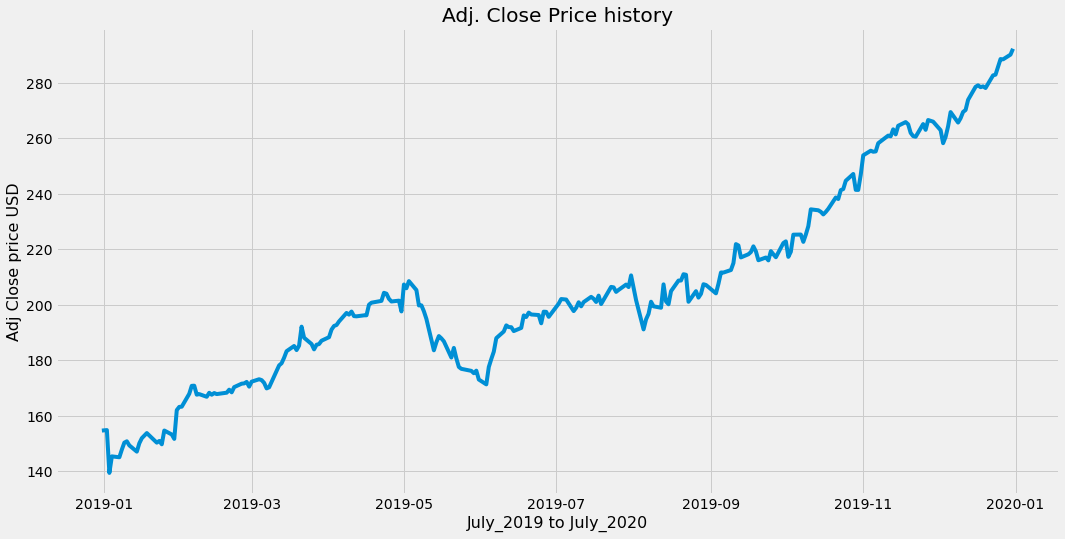

In [8]:
#Visually show the price
plt.figure(figsize=(16,8))
plt.plot(DF['Adj Close'], label='Adj Close Price')
plt.title('Adj. Close Price history')
plt.xlabel('July_2019 to July_2020', fontsize=16)
plt.ylabel('Adj Close price USD', fontsize=16)
plt.show();

In [10]:
#Prepare the data to calculate the RSI 
# get the difference in price 
delta =DF['Adj Close'].diff(1)
delta

Date
2018-12-31          NaN
2019-01-02     0.176437
2019-01-03   -15.418732
2019-01-04     5.949875
2019-01-07    -0.323441
                ...    
2019-12-24     0.268616
2019-12-26     5.611481
2019-12-27    -0.109467
2019-12-30     1.711304
2019-12-31     2.119202
Name: Adj Close, Length: 253, dtype: float64

In [11]:
#Get rid of NaN
delta=delta.dropna()
delta

Date
2019-01-02     0.176437
2019-01-03   -15.418732
2019-01-04     5.949875
2019-01-07    -0.323441
2019-01-08     2.764175
                ...    
2019-12-24     0.268616
2019-12-26     5.611481
2019-12-27    -0.109467
2019-12-30     1.711304
2019-12-31     2.119202
Name: Adj Close, Length: 252, dtype: float64

In [12]:
#Get the positive gains(up) and the negative gains(down):
up=delta.copy()
down=delta.copy()

up[up<0]=0
down[down>0]=0

In [13]:
#Get the time period:
period=14
#Calculate the average gain and average loss
AVG_Gain=up.rolling(window=period).mean()
AVG_Loss=abs(down.rolling(window=period).mean())

In [14]:
#Calculate he RSI
#Calculate the RS
RS=AVG_Gain/AVG_Loss
#Calculate the RSI
RSI=100.0-(100.0/(1.0+RS))

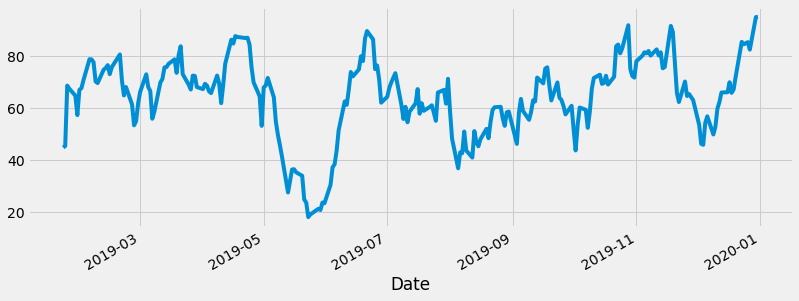

In [15]:
#Show the RSI Visually
plt.figure(figsize=(12.2,4.5))
RSI.plot()
plt.show();


In [17]:
#Put it all together 
#Create a new df 
new_df=pd.DataFrame()
new_df['Adj Close']=DF['Adj Close']
new_df['RSI']=RSI
new_df

,Adj Close,RSI
Date,,
2018-12-31,154.618546,NaN
2019-01-02,154.794983,NaN
2019-01-03,139.376251,NaN
2019-01-04,145.326126,NaN
2019-01-07,145.002686,NaN
...,...,...
2019-12-24,282.831299,84.544601
2019-12-26,288.442780,85.353094
2019-12-27,288.333313,82.476969


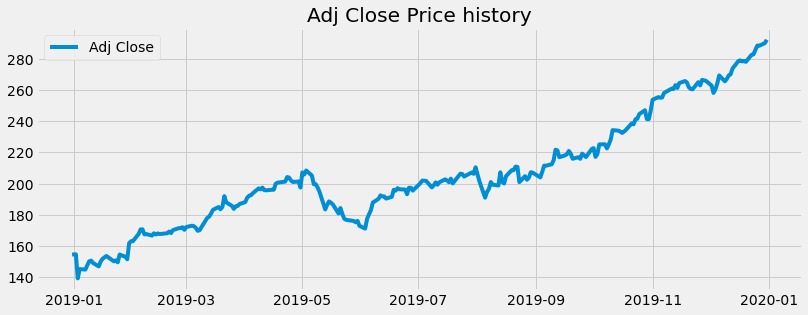

In [18]:
#Visually show the ajusted close price and RSI
#Plot the adj close pirice
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df.index, new_df['Adj Close'])
plt.title('Adj Close Price history')
plt.legend(new_df.columns.values, loc='upper left')
plt.show();

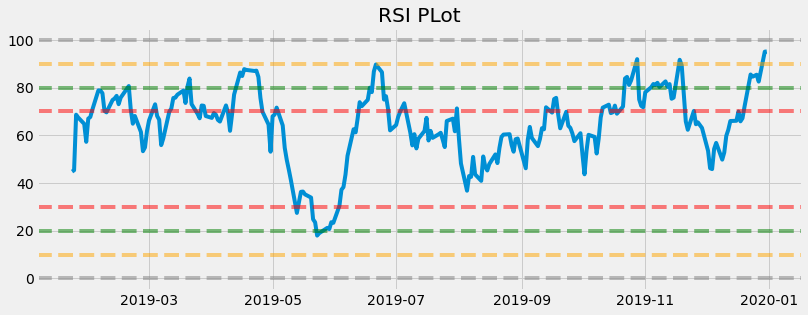

In [19]:
#plot the corresponding RSI values and the significant levels
plt.figure(figsize=(12.2,4.5))
plt.title('RSI PLot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0,linestyle='--', alpha=0.5, color='gray')
plt.axhline(10,linestyle='--', alpha=0.5, color='orange')
plt.axhline(20,linestyle='--', alpha=0.5, color='green')
plt.axhline(30,linestyle='--', alpha=0.5, color='red')
plt.axhline(70,linestyle='--', alpha=0.5, color='red')
plt.axhline(80,linestyle='--', alpha=0.5, color='green')
plt.axhline(90,linestyle='--', alpha=0.5, color='orange')
plt.axhline(100,linestyle='--', alpha=0.5, color='gray')
plt.show();